# How to Use Matplotlib Pyplot

Matplotlib relies on a user-specified graphical backend to draw on your screen. 

Before you can plot anything, you need to specify which backend Matplotlib should use. 

If you are in Jupyter Notebook, you can use: 

- %matplotlib inline

This command tells Jupyter to set up Matplotlib so it uses Jupyter's own backend, so the plots are rendered in the notebook itself. 
- show() is optional in Jupyter because Jupyter will automatically display plots when a cell is executed. 

Note: 

The pyplot API is generally less flexible than the object-oriented API. 

Most of the function calls you see here can also be called as methods from an __Axes__ object. 

Each pyplot function makes some change to a __figure__. 
- creates a figure
- creates a plotting area in a figure
- plots some points in a plotting area
- plots some lines in a plotting area
- decorates the plot with labels
- adjusts the axes
- etc. 

## The fast option:

If you just want fast data plot, just try __plot(mydata)__ and see what happens.

In [1]:
import matplotlib.pyplot as plt

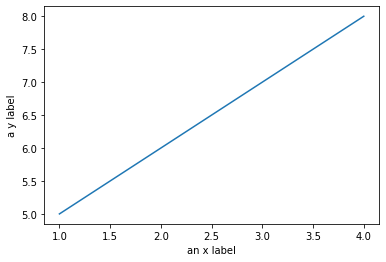

In [2]:
x = [1,2,3,4]
y = [5, 6, 7, 8]
plt.plot(x,y)
plt.ylabel("a y label")
plt.xlabel("an x label")
plt.show() 

## Setting point and line colors and types:
- color = (
           'r', # Red
           'g', # Green
           'b', # Blue
           'c', # Cyan
           'm', # Magenta (Mauve?)
           'y', # Yellow
           'w', # White
           'k') # Black
           
          
- filled_markers = (
                    'o', # Solid dots
                    'v', # Down triangles
                    '^', # Up triangles
                    '<', # Left triangles
                    '>', # (Point) Right triangles
                    '8', # More solid dots
                    's', # Squares
                    'p', # Pentagons
                    '*', # Stars
                    'h', # Up Hexagons
                    'H', # Side Hexagons
                    'D', # Diamonds (tilted square)
                    'd', # Diamonds (playing card type)
                    'P', # Plus signs
                    'X', # Bold X
                    'x') # Thin x
                    
- lineStyles = (
                '-', # Solid line
               '--', # Dashed line
               '-.', # Dash-dot line
                ':', # Dotted line
             'None', # No line
                 '', # No line)

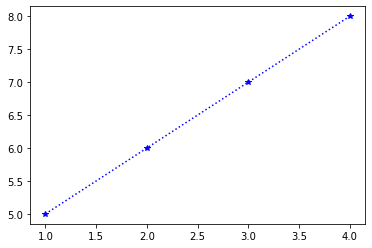

In [3]:
plt.plot(x, y, "b*:") # Blue Stars with a dotted line. Get it? 

# Triangles are ^

# if you don't call plt.show(), you receive the Lines2D object. 
# suppress the text by calling plt.plot() or put ; after the plt.plot(blabla);

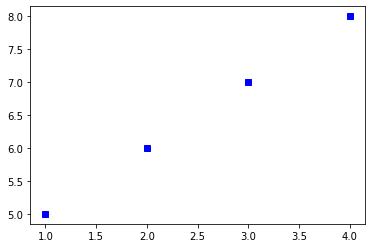

In [4]:
plt.plot(x, y, 'bs')

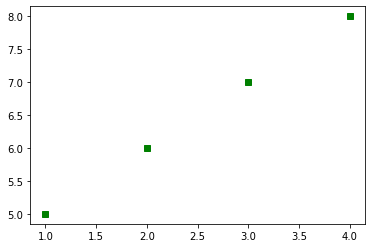

In [5]:
plt.plot(x, y, 'gs')

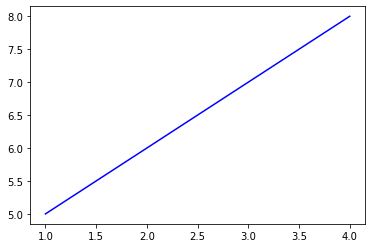

In [6]:
plt.plot(x, y, 'b-') # note 'b-' is default

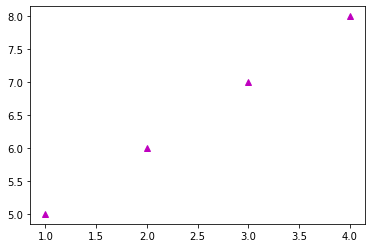

In [7]:
plt.plot(x, y, 'm^')

### You can stack formatting to get dotted lines.

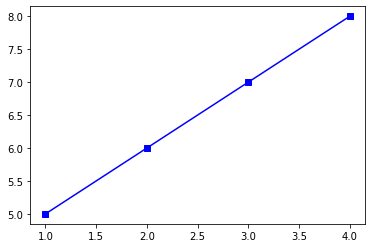

In [8]:
plt.plot(x, y, 'bs-') 

## Setting axis limits: 
- Can pass in as a list un the plt.axis() function

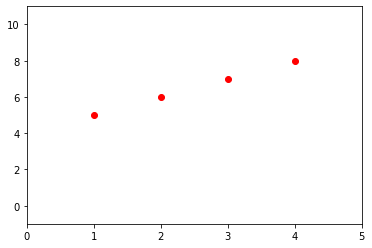

In [9]:
plt.plot(x, y, 'ro')

xmin = 0
ymin = -1
xmax = 5
ymax = 11

limits = [xmin, xmax, ymin, ymax]
plt.axis(limits) # [xmin, xmax, ymin, ymax]
plt.show()

## Generally Matplotlib works with Numpy Arrays
- All sequences such as lists are automatically converted if not. 

In [10]:
import numpy as np

In [11]:
times = np.arange(0,6.,1) 
# np.arange(start, stop, interval)

times1 = np.linspace(0, 5, 6)
# np.linspace(start, stop, quantity)

times, times1

(array([0., 1., 2., 3., 4., 5.]), array([0., 1., 2., 3., 4., 5.]))

## Multiple sets of lines on the same plot: 
- plt.plot(x1, y1, 'style1', x2, y2, 'style2', ........)
- If you have something like:
    - lines = plt.plot(x, y, x2, y2)
- You can say lines[0] to get the first pair, and set its properties with:
    - plt.setp(lines[0], kwargs)
    - plt.setp(


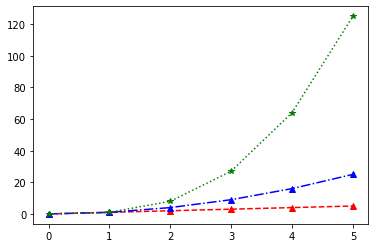

In [12]:
plt.plot(times, times1, 'r^--', times, times1**2, 'b^-.', times, times**3, 'g*:')


Plotting with Keyword Strings: 

- When your data is in a format that allows access with strings, like: DataFrames, np.recarray, the __data__ keyword argument in plot allows you to plot different named sets of data without having to write them all out like above. 

For example: using a dictionary:

In [13]:
quantity = 50
lowval = 0
highval = 300

mydata = {'a': np.arange(quantity), # uniform integer range. 
          'c': np.random.randint(lowval, highval, quantity), # Random uniform integers in a range
          'd': np.random.randn(quantity)} # Random normal draws

mydata['b'] = mydata['a']+10*np.random.randn(quantity) # create new key for 'b' with gaussian noise
mydata['d'] = np.abs(mydata['d'])*100 # absolute value, *100

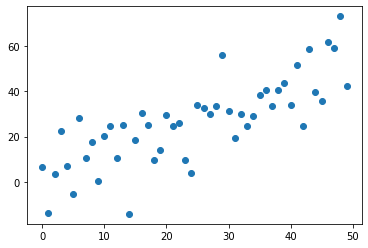

In [14]:
plt.scatter('a', 'b', data=mydata) # can use a dictionary to plot if provide the x and y keys with arg data=mydict
plt.show()

### 'c' argument in plt.scatter specifies color. 
### 's' argument in plt.scatter specifies size. 

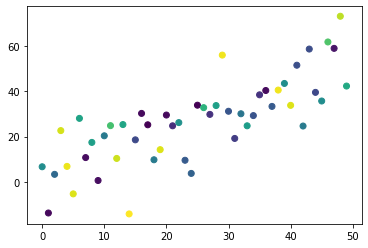

In [15]:
plt.scatter('a', 'b', c='c', data=mydata)

Text(0.5, 1.0, 'my title')

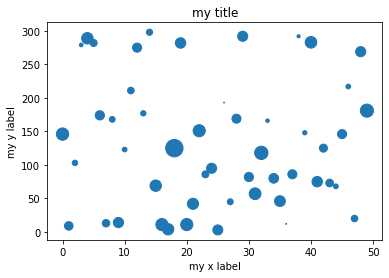

In [16]:
plt.scatter('a', 'c', s='d', data=mydata)
plt.xlabel('my x label')
plt.ylabel('my y label')
plt.title('my title')

# Subplots & Categorical Plotting

- create figure, specify size in inches (width, height)
    - Note: when you define plt.figure(figsize=(width,height))) __This is NOT 1:1 WITH YOUR SCREEN.__
- plt.subplot(num_rows, num_cols, current_pos)
- plt.suptitle("big title for all my subplots")

### Note: plt.subplot returns figure, axes for each. This seems like a convenience function bit. 

Additional guidance on group plots
- https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html

## Categorical plotting

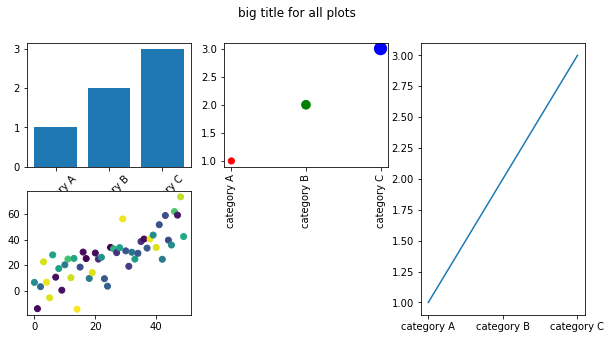

In [17]:
names = ['category A', 'category B', 'category C']
values = [1,2,3]

figure1 = plt.figure(figsize=(10,5)) # figsize: Width, height in inches.

plt.subplot(2,3,1) # One Row, Three Columns, Position 1
plt.bar(names, values)
plt.xticks(rotation=45)

plt.subplot(2,3,2) # One Row, Three Columns, Position 2
plt.scatter(names, values, s=[38, 75, 150], c=['r','g','b'])
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.scatter('a','b', c='c', data=mydata)

# Note: subplots are independent, so here's a numerical scatterplot
plt.subplot(2,3,(3,6)) # This takes up positions 3 and 6
plt.plot(names, values)

plt.suptitle("big title for all plots")
plt.show()

In [18]:
figure1.show()

<ipython-input-18-e32b7d7b4ca0>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure1.show()


<BarContainer object of 4 artists>

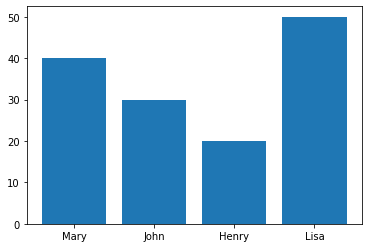

In [19]:
sales = [('Mary', 40),('John', 30),('Henry', 20),('Lisa', 50)]
plt.bar(*zip(*sales))
# Just like Daft Punk, zip unzip it:
# https://treyhunner.com/2018/10/asterisks-in-python-what-they-are-and-how-to-use-them/

In [20]:
for entry in zip(*sales):
    print(entry)

('Mary', 'John', 'Henry', 'Lisa')
(40, 30, 20, 50)


## Line Properties

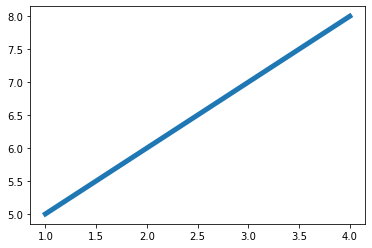

In [21]:
plt.plot(x, y, linewidth=5) # 2 is default

[]

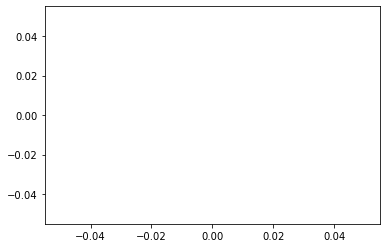

In [22]:
plt.plot()

## You can set plot properties with plt.setp(kwargs)
- This works with python syntax plt.setp(key=val, key1=val1, ...)
- Or with Matlab-style string-value pairs plt.setp(key, val, key1, val1, ...)
- plt.setp() or just Line2D and Scatter objects have many attributes you can set. If you want something more specific (e.g. rounded line edges versus square, or arrows or something, just google the keyword for it). 

###  Set Properties by using plt.setp(mygraphdata, kwargs)

- lines objects have many attributes you can look at with my2DLine.PRESSTABNOW

[None, None]

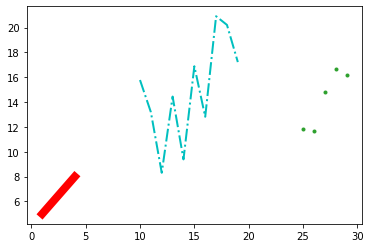

In [23]:
x2 = np.arange(10,20)
y2 = np.arange(10,20)+np.random.randn(10)*3 # Add gaussian noise
x3 = np.arange(25,30)
y3 = np.arange(10,20,2)+np.random.randn(5)*2 

lines = plt.plot(x, y, x2, y2, x3, y3)
# set the first line group to have a super fat red line
# set the second line group to have a normal-width dot dash, cyan line
plt.setp(lines[0], linewidth=8, linestyle='-', c='r')
plt.setp(lines[1], linewidth=2, linestyle='-.', c='c') 
plt.setp(lines[2], marker=".", linestyle="") # 'sort of' scatter by turning off lines haha

In [24]:
lines[2].properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'antialiased': True,
 'children': [],
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x7fd21e77a430>,
 'clip_on': True,
 'clip_path': None,
 'color': '#2ca02c',
 'contains': None,
 'dash_capstyle': 'butt',
 'dash_joinstyle': 'round',
 'data': (array([25, 26, 27, 28, 29]),
  array([11.86319255, 11.64134465, 14.80286037, 16.63230812, 16.15973568])),
 'drawstyle': 'default',
 'figure': <Figure size 432x288 with 1 Axes>,
 'fillstyle': 'full',
 'gid': None,
 'in_layout': True,
 'label': '_line2',
 'linestyle': 'None',
 'linewidth': 1.5,
 'marker': '.',
 'markeredgecolor': '#2ca02c',
 'markeredgewidth': 1.0,
 'markerfacecolor': '#2ca02c',
 'markerfacecoloralt': 'none',
 'markersize': 6.0,
 'markevery': None,
 'path': Path(array([[25.        , 11.86319255],
        [26.        , 11.64134465],
        [27.        , 14.80286037],
        [28.        , 16.63230812],
        [29.        , 16.15973568]]), None),
 'path_effects': [],

## Working with multiple figures and axes:

Both pyplot and Matlab have the concept of "current figure" and "current axes".
All plotting functions apply to the current set. 

The function $\color{orange}{\text{gca()}}$ returns the current axes: 
- This is a $\color{orange}{\text{matplotlib.axes.Axes}}$ object instance. 

The function $\color{orange}{\text{gcf()}}$ returns the current figure: 
- This is a $\color{orange}{\text{matplotlib.figure.Figure}}$ object instance. 

Normally you don't have to tinker with this because it's pretty intuitive to use. 

### Note: if you want a different color line than the points it connects, you may have to use two different (basically duplicate) plots on the same axes. 

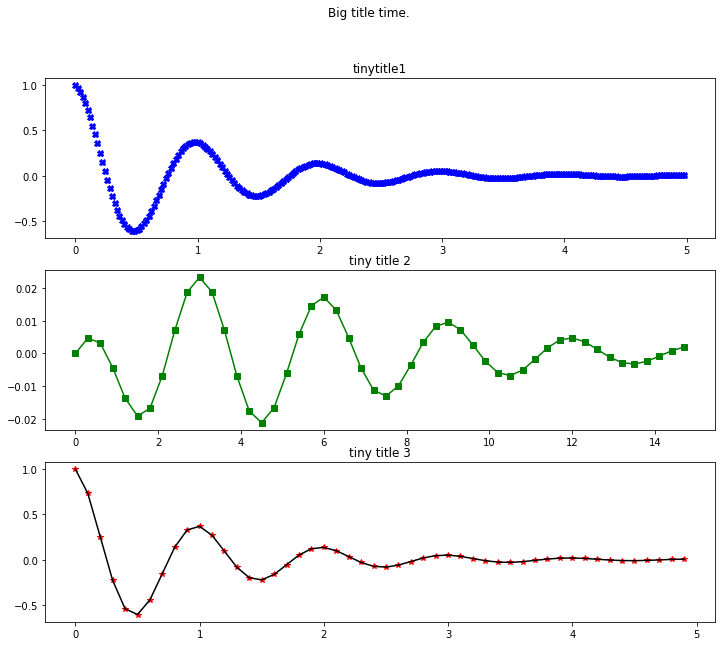

In [25]:
def squigglyline(time):
    return np.exp(-time)*np.cos(2*np.pi*time)

time1 = np.arange(0, 5.0, 0.1)
time2 = np.arange(0., 5, 0.02)

# Create the figure
fig1 = plt.figure(figsize=(12, 10)) # Width, height
fig1.tight_layout()
# Designate the first of two plots
plt.subplot(3,1,1)
plt.plot(time2, squigglyline(time2), 'bX')
plt.title("tinytitle1")

plt.subplot(3,1,2)
plt.plot(time1*3, np.tan(2*np.pi*time1/100)*squigglyline(time1), 'gs-')
plt.title("tiny title 2")

plt.subplot(3,1,3)
plt.plot(time1, squigglyline(time1), 'r*')
plt.plot(time1, squigglyline(time1), 'k-')
plt.title("tiny title 3")

plt.suptitle("Big title time.")
plt.show() # to remove the text; alternatively could have used ;

# Just like matlab: pyplot holds on to the last open figure, whether you like it or not. 
- you can clear the current figure with __clf__
- you can clear the current axes with __cla__
- if you are making lots of figures, to remove the memory of the last figure you can explicitly call __close__

# Histogram time: 

## Adding text to plots (and functions) 
- Use a raw string and just put latex // markdown format between the dollar signs

## Annotating plots as well

In [26]:
mu, sigma = 5, 1.25
quantity = 500

import scipy.stats as ss
xhist = ss.norm.rvs(size=quantity,loc=mu, scale=sigma)
# The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

Note: hist returms n, bins, and "patches". shift+tab in the function to see what these are.

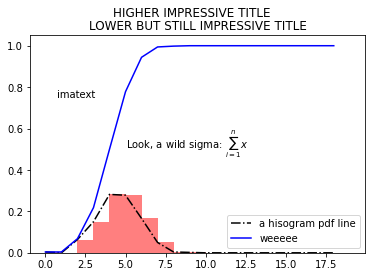

In [27]:
n, bins, patches = plt.hist(xhist, 
                            color='r', # bin color
                            bins=np.arange(0,20), # where and how many bins do you have? 
                            align='mid', # where are your bins centered?
                            range=[-10,20], # values before and after which are truncated.
                            density = True, # If ``True``, draw and return a probability density: 
                            # each bin displays the bin's raw count divided by the total number of counts 
                            # *and the bin width*
                            cumulative = False, # cumulative hist if True
                            orientation="vertical", # could also be horizontal
                            alpha = 0.5) # transparency: 0 = invisible, 1 = solid


    
cumhistline = np.cumsum(n)
plt.plot(n, 'k-.', label="a hisogram pdf line")
plt.plot(cumhistline, 'b-', label="weeeee")
plt.text(x=0.75, y=0.75, s ="imatext") # Add the text s to the axes at location x, y in data coordinates.
plt.text(x=5, y=0.5, s=r"Look, a wild sigma: $\sum_{i=1}^{n}{x}$") # Note the raw string
plt.legend()
plt.title("LOWER BUT STILL IMPRESSIVE TITLE")
plt.suptitle("HIGHER IMPRESSIVE TITLE")

plt.show()

### Most pyplot functions operate on the open figure object, which is usually the last plot you ran.

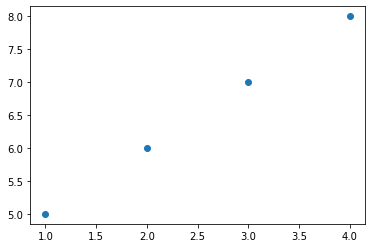

In [28]:
figuuur = plt.figure()
figuuur.add_subplot(1,1,1)
plt.scatter(x,y) 

# Note: treat each cell as the instance. 
# Not quite sure how to save / reuse the figure object yet. 

### plt.annotate() has all the stuff you need to add things to your plots

Text(3, 0.6, 'happy text')

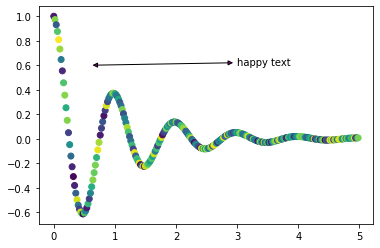

In [29]:
figurrrr = plt.figure(num=2)
plt.subplot(1,1,1)
plt.scatter(time2,squigglyline(time2),c=np.random.random(size=len(time2)))

plt.annotate("happy text", 
             xy=(0.6, 0.6),
             xytext=(3, 0.6), 
             arrowprops=dict(facecolor='purple', 
                             arrowstyle='<|-|>'
                             # shrink=0.5, # shrink the arrow (no shrink @ 1), depends on the type of arrow
                            ), 
            )

## Making Log axes and other nonlinear axes:

# How Figure Relates to Axes
plt.subplots() returns two things: 
1. a figure
2. an axis (or set of axes, depending on the number of subplots)

So if you set it up like this, then you're kind of jumping up multiple classes when you don't need to. 
It will still work, with plt.subplot(), plt.plot()... etc. 
But you could also do:
myfig1, myax1 = plt.subplots()
- see code cell below log axes

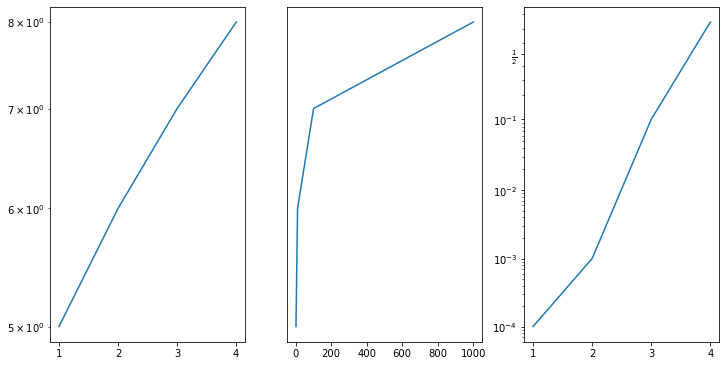

In [30]:
fig = plt.figure(3,figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(x, y)
plt.yscale("log")

plt.subplot(1,3,2)
plt.plot([1, 10, 100, 1000],y)
plt.yscale("symlog")

plt.subplot(1,3,3)
plt.plot(x,[0.0001, 0.001, 0.1, 0.75])
plt.yscale("logit")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


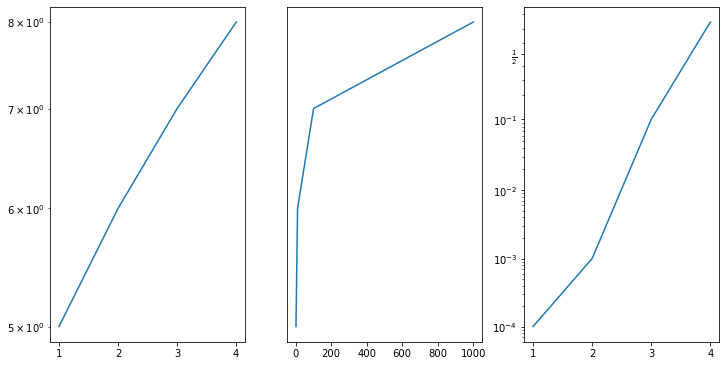

In [31]:
fig

## Here is how to use the object-oriented style for plot generation in matplotlib:

In [3]:
import numpy as np


# fig = plt.figure(figsize=(8, 6))
# # Adds subplot on position 1
# ax = fig.add_subplot(121)
# # Adds subplot on position 2
# ax2 = fig.add_subplot(122)

# You can do this one of two ways: 
1. Use myfig, myaxs = plt.subplots(nrows=, ncols=, num=)
    - Note: if nrows*ncols > 1 (i.e. more than one subplot to the figure), myaxs will not return a plt.axes.Axes object, it will return an ARRAY of such objects. 
2. Use myfig = plt.figure(figsize=(wid,heit),num=), then myax1 = myfig.add_subplot(rowcolpos) # i.e. 121

## Option 1 Example (Using myfig, myaxs = plt.subplots(nrows=,ncols=,num=,figsize=())

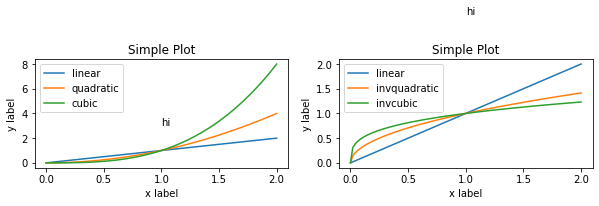

In [35]:
x = np.linspace(0, 2, 100)
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
# plt.subplots returns either one axis object, or an ARRAY of axs
# Note: axs is preferred over axes, because axes is not clear whether it is singular or plural
# i.e. one set of x-y axes or two sets of x-y axes


figtest, axasdf = plt.subplots(nrows=1,ncols=2,num=5,figsize=(10,2))  # Create a figure and an axes.
axasdf[0].plot(x, x, label='linear')  # Plot some data on the axes.
axasdf[0].plot(x, x**2, label='quadratic')  # Plot more data on the axes...
axasdf[0].plot(x, x**3, label='cubic')  # ... and some more.
axasdf[0].set_xlabel('x label')  # Add an x-label to the axes.
axasdf[0].set_ylabel('y label')  # Add a y-label to the axes.
axasdf[0].set_title("Simple Plot")  # Add a title to the axes.
axasdf[0].text(1, 3, "hi")
axasdf[0].legend()  # Add a legend.

axasdf[1].plot(x, x, label='linear')  # Plot some data on the axes.
axasdf[1].plot(x, x**.5, label='invquadratic')  # Plot more data on the axes...
axasdf[1].plot(x, x**.3, label='invcubic')  # ... and some more.
axasdf[1].set_xlabel('x label')  # Add an x-label to the axes.
axasdf[1].set_ylabel('y label')  # Add a y-label to the axes.
axasdf[1].set_title("Simple Plot")  # Add a title to the axes.
axasdf[1].text(1, 3, "hi") # Note: the xy location is SUBPLOT DEPENDENT
axasdf[1].legend()  # Add a legend.

plt.show()

## Option 2: Using myfig=plt.figure(figsize=(), num=), then myfig.add_subplot(rowcolpos)
- Note: Keep the row, col, and position consistent, or it will smush the axes together.

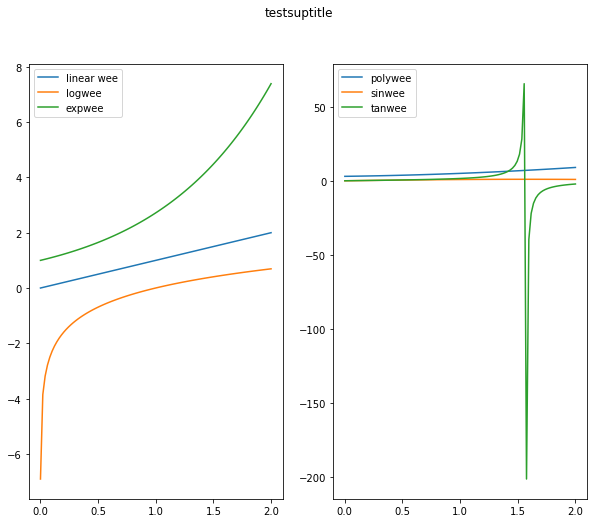

In [51]:
fig12 = plt.figure(figsize=(10, 8), num=12)
ax12_1 = fig12.add_subplot(121)
ax12_1.plot(x,x, label='linear wee')
ax12_1.plot(x,np.log(x+0.001), label='logwee')
ax12_1.plot(x,np.exp(x), label='expwee')
ax12_1.legend()
#ax12_1.legend(['test?']) # NOTE YOU CAN MANUALLY OVERRIDE THE LEGEND



ax12_2 = fig12.add_subplot(122)
ax12_2.plot(x, x+x**2+3, label='polywee')
ax12_2.plot(x, np.sin(x), label='sinwee')
ax12_2.plot(x, np.tan(x), label='tanwee')
ax12_2.legend()

fig12.suptitle('testsuptitle')


plt.show()

# Plotting function:

In [34]:
def happylittleplot(ax, depvar, indepvar, paramdict):
    """
    depvar = a numpy array or pandas Series for the y-axis
    
    indepvar = a numpy array or pandas Series for the x-axis
    
    """
    out = ax.plot(depvar, indepvar, **paramdict)
    return out


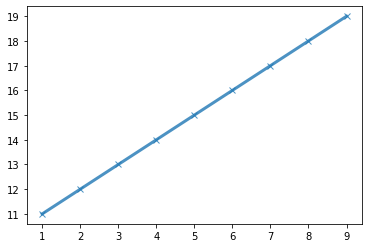

In [35]:
data1 = depvar = np.arange(1, 10)
data2 = indepvar = np.arange(11, 20)
subplotrows = 1
subplotcols = 1

figureEx, axEx = plt.subplots(subplotrows, subplotcols)

plt.show(happylittleplot(axEx, depvar, indepvar, {"marker": "x", "alpha": 0.8, "linewidth":3, "linestyle":'-'}))


### How to color text: 

In $\color{orange}{test1 ~test2}$
- treats the test1 and test2 like an equation (so spacing by ~ and mathfont). 

$\color{red}{\text{howtocolortext}}$
- forces text in the equation with \text{} tag

In [36]:
for i in range(1, 2):
    print(i)

1
